In [105]:
import numpy as np
import pandas as pd

In [106]:
df = pd.read_csv("Churn_Modelling.csv")

In [107]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [108]:
df.shape

(10000, 14)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [92]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [93]:
df.duplicated().sum()

0

In [94]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [110]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [111]:
# Dropping irrelvent Columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [112]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [113]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
# Encoding categorical data

In [116]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [25]:
#we have data imabalancy here 

In [12]:
X = df.drop(columns="Exited",axis=1)

In [13]:
y = df["Exited"]

In [33]:
#Handling data imbalance with SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [17]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [13]:
#Now we will split our data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [20]:
X_train.shape

(12740, 11)

In [21]:
X_test.shape

(3186, 11)

In [27]:
#Now we will perform feature scaliing to maintain consistency between features

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train

array([[-0.72305013, -0.00303993,  0.44347123, ..., -0.76225814,
         1.5927724 ,  0.80334121],
       [ 1.09631595,  0.0970342 , -1.39255615, ..., -0.76225814,
        -0.62783609,  0.80334121],
       [ 0.25239313,  0.79755312, -1.02535068, ...,  1.31189153,
        -0.62783609, -1.24480108],
       ...,
       [ 0.19759294,  0.19710833,  1.17788218, ..., -0.76225814,
        -0.62783609,  0.80334121],
       [ 1.33743675,  0.0970342 , -0.6581452 , ...,  1.31189153,
        -0.62783609,  0.80334121],
       [ 0.52639404,  0.99770138, -1.39255615, ...,  1.31189153,
        -0.62783609,  0.80334121]])

In [33]:
#Model Building

In [23]:
#Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [25]:
lg.fit(X_train,y_train)

C:\Users\Priyanshu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = lg.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.7435655994978029

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [37]:
precision_score(y_test,y_pred)

0.7693997071742313

In [33]:
recall_score(y_test,y_pred)

0.6767546683837733

In [36]:
f1_score(y_test,y_pred)

0.7201096265844468

In [38]:
#DecisionTree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [40]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred2 = dt.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred2)

0.8185812931575643

In [45]:
precision_score(y_test,y_pred2)

0.800369685767098

In [47]:
recall_score(y_test,y_pred2)

0.836445589182228

In [48]:
f1_score(y_test,y_pred2)

0.8180100755667506

In [49]:
#using various algorithm together

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

In [63]:
svc = SVC()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

In [52]:
clfs = {
    "svc" : svc,
    "kn" : knc,
    "rf" : rfc,
    "ab" : abc,
    "bc" : bc,
    "et" : etc,
}

In [64]:
def trainClassfier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    return accuracy,precision,recall,f1


In [65]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1 = trainClassfier(clf,X_train,y_train,X_test,y_test)
    
    print("for",name)
    print("accuracy",current_accuracy)
    print("precsion",current_precision)
    print("Recall",current_recall)
    print("F1_score",current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

for svc
accuracy 0.4874450721908349
precsion 0.4874450721908349
Recall 1.0
F1_score 0.6554125342899346
for kn
accuracy 0.6848713119899561
precsion 0.6457780138077536
Recall 0.7830006439150032
F1_score 0.7077997671711292
for rf
accuracy 0.8763339610797238
precsion 0.8674698795180723
Recall 0.8808757244043787
F1_score 0.8741214057507988


C:\Users\Priyanshu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for ab
accuracy 0.8283113622096673
precsion 0.8175505050505051
Recall 0.8338699291693497
F1_score 0.8256295824035703
for bc
accuracy 0.8634651600753296
precsion 0.8442118226600985
Recall 0.8828074694140373
F1_score 0.8630783758262511
for et
accuracy 0.8675455116133082
precsion 0.8567823343848581
Recall 0.8744365743721829
F1_score 0.8655194391332058


In [66]:
performance_df = pd.DataFrame({"Algorihtm":clfs.keys(),"accuracy": accuracy_scores,"precision":precision_scores,"Recall":recall_scores,"f1":f1_scores})

In [67]:
performance_df

,Algorihtm,accuracy,precision,Recall,f1
0,svc,0.487445,0.487445,1.000000,0.655413
1,kn,0.684871,0.645778,0.783001,0.707800
2,rf,0.876334,0.867470,0.880876,0.874121
3,ab,0.828311,0.817551,0.833870,0.825630
4,bc,0.863465,0.844212,0.882807,0.863078
5,et,0.867546,0.856782,0.874437,0.865519


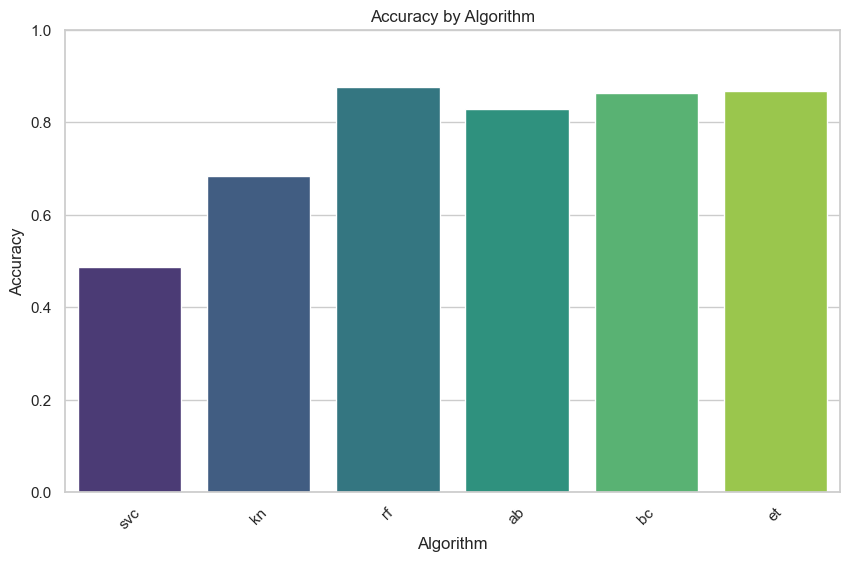

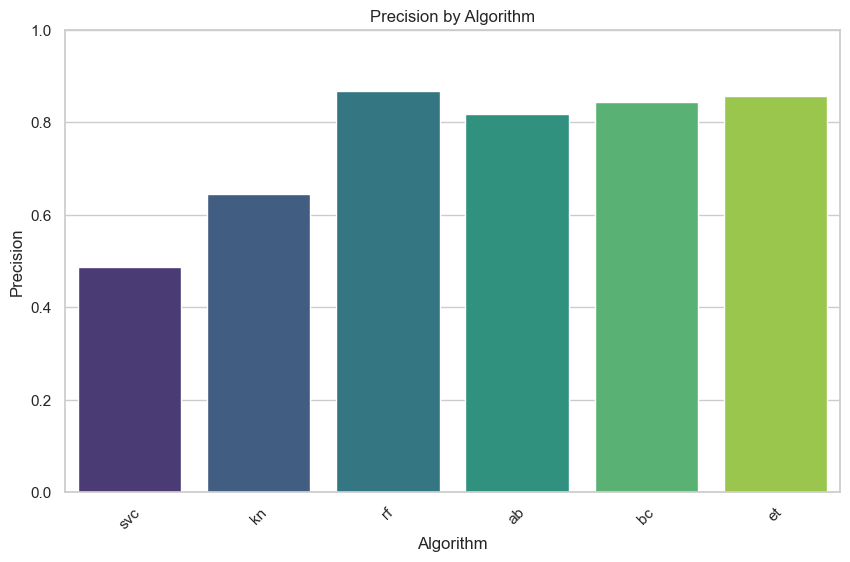

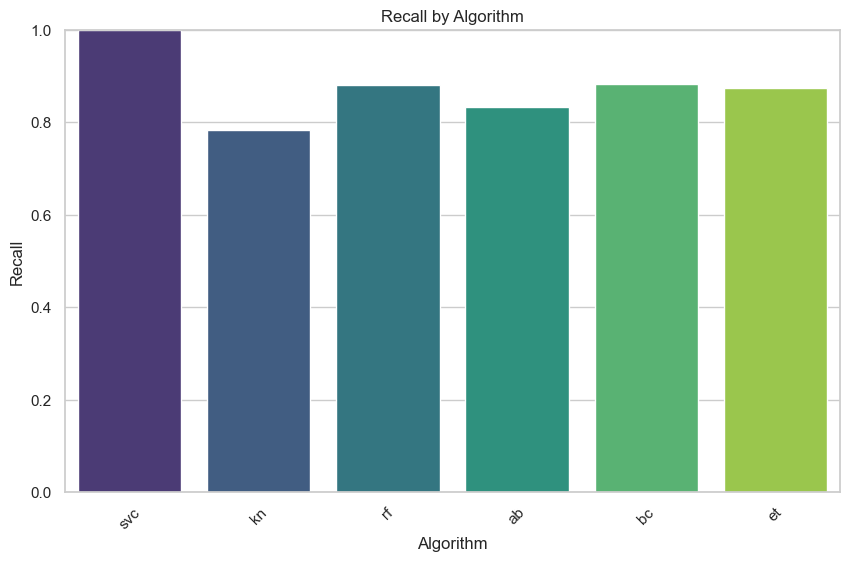

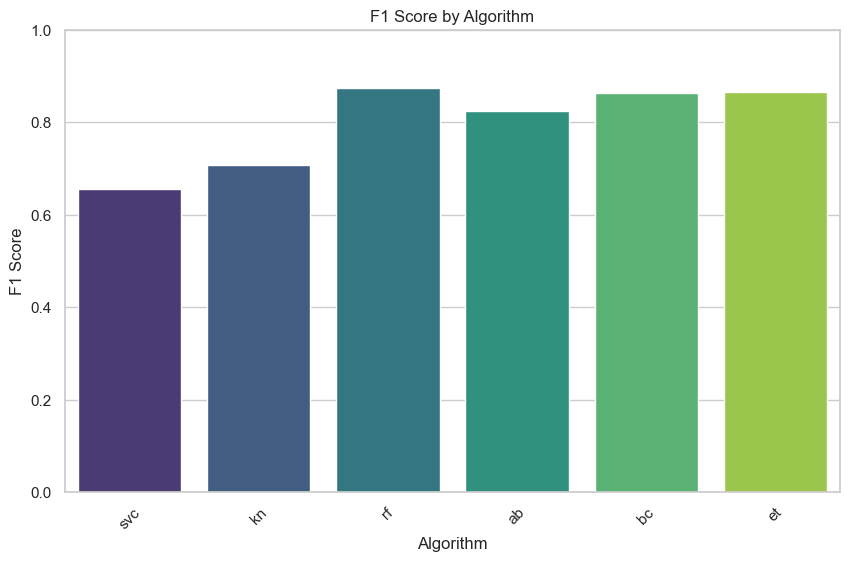

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming clfs.keys(), accuracy_scores, precision_scores, recall_scores, and f1_scores are predefined
performance_df = pd.DataFrame({
    "Algorithm": clfs.keys(),
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores
})

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Algorithm", y=metric, data=performance_df, palette="viridis")
    plt.title(f"{metric} by Algorithm")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Assuming the metrics are within the range [0, 1]
    plt.ylabel(metric)
    plt.xlabel("Algorithm")
    plt.show()

In [72]:
#so after doing all this the random forest is best one to perform in all measures

In [73]:
X_res = sc.fit_transform(X_res)

In [74]:
rfc.fit(X_res,y_res)

RandomForestClassifier(n_estimators=50, random_state=42)

In [75]:
import joblib

In [77]:
joblib.dump(rfc,"churn_prediction_model")

['churn_prediction_model']

In [78]:
model = joblib.load('churn_prediction_model')

In [81]:
model.predict([[619,422,2,0.0,0,0,0,101348.83,0,0,0]])

array([1], dtype=int64)